In [2]:
# Tarvittavien kirjastojen tuonti
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

In [4]:
DATAN_POLKU = "../data/kappaleet.npz"

DATAN_POLKU = "../data/kappaleet.npz"

def lataa_data():
    data = np.load(DATAN_POLKU, allow_pickle=True)

    # Accessing the training and testing data
    X_train = data['X_train']
    y_train = data['y_train']
    X_test = data['X_test']
    y_test = data['y_test']
    labels = data['labels']
    
    return X_train, y_train, X_test, y_test, labels



X_train, y_train, X_test, y_test, labels = lataa_data()

print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)
print("labels:", labels)


X_train: (1387, 64, 862)
y_train: (1387, 3)
X_test: (347, 64, 862)
y_test: (347, 3)
labels: ['fusku' 'salsa' 'valssi']


In [10]:
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense, Dropout, BatchNormalization, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras import backend as K
from tensorflow import keras


# metriikka mallin arvioimiseksi
@keras.saving.register_keras_serializable()
def metric(y_true, y_pred):
    return K.mean(K.equal(K.argmax(y_true, axis=1), K.argmax(y_pred, axis=1)))

# CNN-mallin määrittely
model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2], 1)),
    Conv2D(64, kernel_size=(4, 4), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 4)),
    Conv2D(64, (3, 5), activation='relu'
                    , kernel_regularizer=regularizers.l2(0.04)
                    ),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),
    Conv2D(64, (2, 2), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.04)),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.04)),
    Dense(y_train.shape[1], activation='softmax')
])

# Mallin kokoaminen
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=[metric])

AttributeError: module 'tensorflow.keras' has no attribute 'saving'

In [1]:
#visualize the model
model.summary()

NameError: name 'model' is not defined

In [12]:
# Mallin kouluttaminen
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 160s 4s/step - loss: 10.0399 - metric: 0.4103 - val_loss: 6.3139 - val_metric: 0.4870
Epoch 2/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 163s 4s/step - loss: 5.5506 - metric: 0.4796 - val_loss: 4.2960 - val_metric: 0.4870
Epoch 3/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 164s 4s/step - loss: 3.2956 - metric: 0.5189 - val_loss: 2.4123 - val_metric: 0.6526
Epoch 4/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 198s 4s/step - loss: 2.2457 - metric: 0.6500 - val_loss: 1.6124 - val_metric: 0.8473
Epoch 5/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 165s 4s/step - loss: 1.9266 - metric: 0.7025 - val_loss: 1.5843 - val_metric: 0.7742
Epoch 6/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 164s 4s/step - loss: 1.4945 - metric: 0.7586 - val_loss: 1.1511 - val_metric: 0.8814
Epoch 7/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 163s 4s/step - loss: 1.2086 - metric: 0.7891 - val_loss: 1.1677 - val_metric: 0.8468
Epoch 8/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 166s 4s/step - loss: 1.1572 - metric: 0.8033 - val_loss: 1.0160 - val_metric: 0.8905
Epoch 9/10
44/4

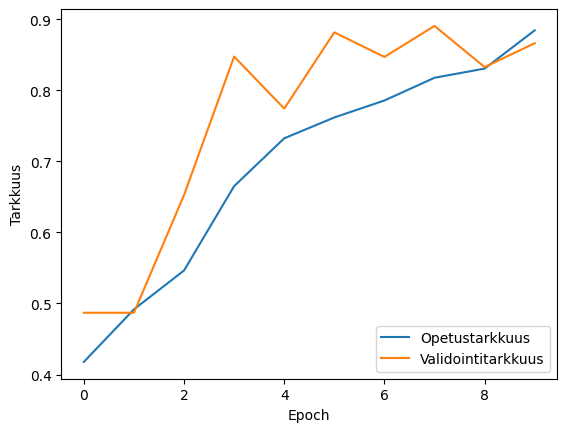

In [14]:
# Mallin suorituskyvyn evaluointi
plt.plot(history.history['metric'], label='Opetustarkkuus')
plt.plot(history.history['val_metric'], label='Validointitarkkuus')
plt.xlabel('Epoch')
plt.ylabel('Tarkkuus')
plt.legend()
plt.show()

In [15]:
VALIDOINTI_DATAN_POLKU = "../data/validointi.npz"

data = np.load(VALIDOINTI_DATAN_POLKU, allow_pickle=True)

X_val = data['X_val']
y_val = data['y_val']
labels = data['labels']

print("X_val:", X_val.shape)
print("y_val:", y_val.shape)
print("labels:", labels)

(99, 64, 862)


In [8]:

from tensorflow.keras.models import load_model

#load the model
model = load_model('tanssimallimme.keras')

#evaluate the model on the validation data
test_loss, test_acc = model.evaluate(X_val, y_val, verbose=2)
print(f'Malli saavutti validoinnissa {test_acc*100:.2f}% tarkkuuden')    

#predict the labels for the validation data
predicted_labels_one_hot = model.predict(X_val)
indices = np.argmax(predicted_labels_one_hot, axis=1)
predicted_labels = labels[indices]

true_labels = labels[np.argmax(y_val, axis=1)]

# Get the confidence (probability) of the predicted class
predicted_confidence = np.max(predicted_labels_one_hot, axis=1)

# Print the true and predicted labels for the first 10 examples
for i in range(len(predicted_labels[:10])):
    prediction_true = true_labels[i] == predicted_labels[i]
    print(f'{prediction_true} Real: {true_labels[i]}, Predicted: {predicted_labels[i]}, Confidence: {predicted_confidence[i]:.2f}')

#plot the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(true_labels, predicted_labels, labels=labels)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


2024-04-05 15:21:51.666426: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-05 15:21:51.667054: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-05 15:21:51.670179: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-05 15:21:51.705447: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-05 15:21:52.606747: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

TypeError: Could not locate function 'metric'. Make sure custom classes are decorated with `@keras.saving.register_keras_serializable()`. Full object config: {'module': 'builtins', 'class_name': 'function', 'config': 'metric', 'registered_name': 'function'}

In [18]:
# save the model whit the best accuracy
model.save('tanssimallimme.keras')
print('Malli tallennettu tiedostoon tanssimallimme.keras')

Malli tallennettu tiedostoon tanssimallimme.h5
